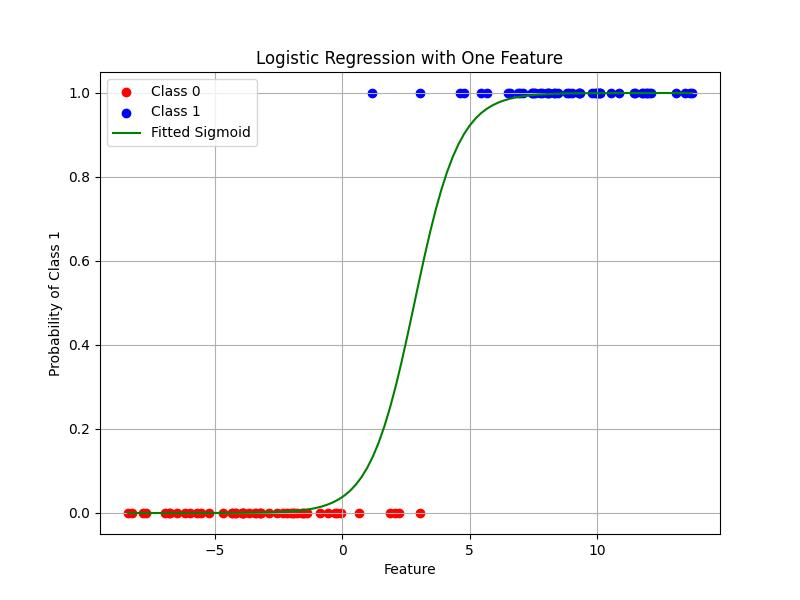

Intercept (bias): [-3.23988332]
Coefficient (slope): [[1.1433796]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

X, y = make_blobs(n_samples=100, n_features=1, centers=2, cluster_std=3, random_state=42)
model = LogisticRegression(fit_intercept=True)
model.fit(X, y)
y_prob = model.predict_proba(X)[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0], y[y == 0], color='red', label='Class 0')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Class 1')
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_vals = model.predict_proba(x_vals)[:, 1]
plt.plot(x_vals, y_vals, color='green', label='Fitted Sigmoid')

plt.xlabel('Feature')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression with One Feature')
plt.legend()
plt.grid(True)
plt.show()

print("Intercept (bias):", model.intercept_)
print("Coefficient (slope):", model.coef_)


Text(0.5, 0.92, 'MSE Loss Surface for Logistic Regression')

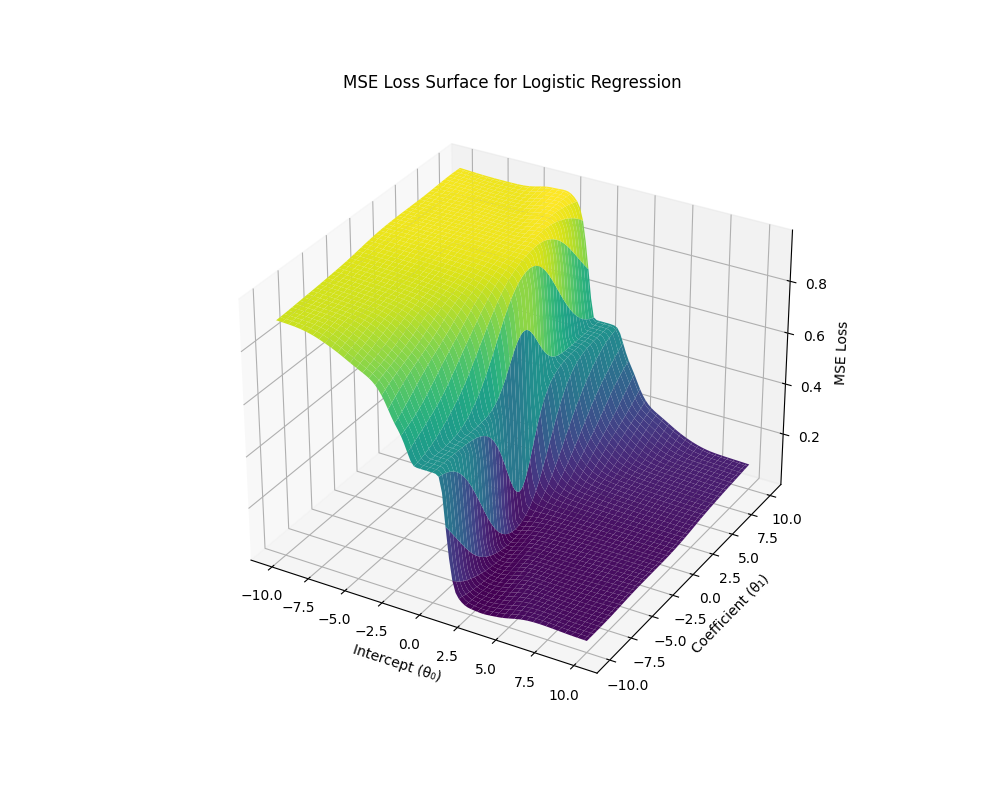

In [5]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compute_mse(theta_0, theta_1, X, y):
    z = theta_0 + theta_1 * X
    y_pred = 1 / (1 + np.exp(-z)) 
    return mean_squared_error(y, y_pred)

theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-10, 10, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_vals, theta_1_vals)

mse_grid = np.zeros_like(theta_0_grid)
for i in range(len(theta_0_vals)):
    for j in range(len(theta_1_vals)):
        mse_grid[i, j] = compute_mse(theta_0_vals[i], theta_1_vals[j], X, y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_grid, theta_1_grid, mse_grid, cmap='viridis')

ax.set_xlabel('Intercept (θ₀)')
ax.set_ylabel('Coefficient (θ₁)')
ax.set_zlabel('MSE Loss')
ax.set_title('MSE Loss Surface for Logistic Regression')



C:\Users\Asus\AppData\Local\Temp\ipykernel_14416\472013854.py:4: RuntimeWarning: divide by zero encountered in log
  loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\Asus\AppData\Local\Temp\ipykernel_14416\472013854.py:4: RuntimeWarning: invalid value encountered in multiply
  loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


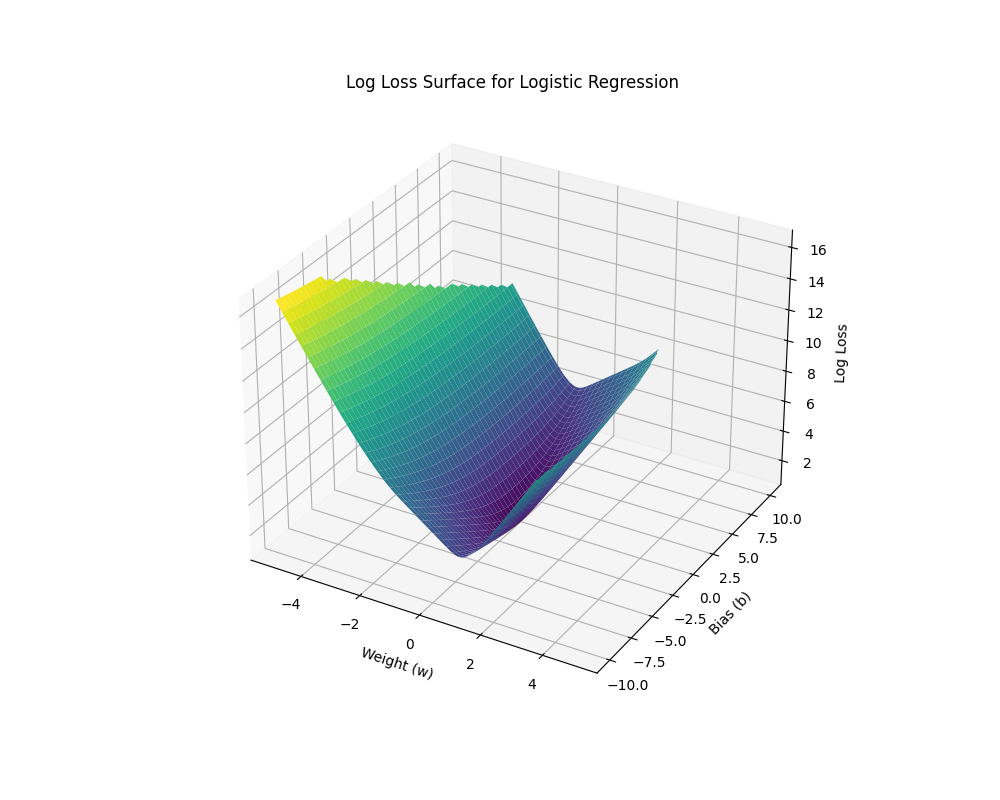

In [6]:
def compute_log_loss(w, b, X, y):
    z = X * w + b
    y_hat = 1 / (1 + np.exp(-z)) 
    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return np.mean(loss)

w_range = np.linspace(-5, 5, 100)  
b_range = np.linspace(-10, 10, 100) 

W, B = np.meshgrid(w_range, b_range)
log_loss_values = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        log_loss_values[i, j] = compute_log_loss(W[i, j], B[i, j], X, y)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(W, B, log_loss_values, cmap='viridis', edgecolor='none')

ax.set_xlabel('Intercept (θ₀)')
ax.set_ylabel('Coefficient (θ₁)')
ax.set_zlabel('Log Loss')
ax.set_title('Log Loss Surface for Logistic Regression')
plt.show()
